## Problem Statment
### Global Stock Market Prediction Based on StockChart Images Using Deep Q-Network
##### The goal of this project is to develop a deep learning model based on Deep Q-Network (DQN) to predict the global stock market movements using stock chart images. The project aims to leverage the power of reinforcement learning to train an agent that can make informed decisions on buying, selling, or holding stocks based on historical price data represented as visual stock chart images.

### 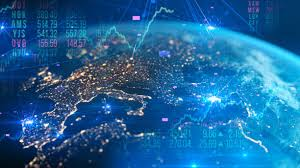

### The problem involves the following key steps:

##### 1]  Data Collection: Obtain historical stock price data for various global stock markets. For each stock, generate visual representations of the      stock charts, which may include candlestick charts, line charts, or other types of charts.
##### 2] Data Preprocessing: Convert the stock chart images into a suitable format for input to the DQN model. Preprocess the data to handle missing values, normalize features, and remove noise if necessary.
##### 3] Reinforcement Learning Setup: Define the reinforcement learning environment where the agent can take actions (buy, sell, hold) and receive rewards based on its actions. The reward function should be designed to incentivize the agent to maximize its profits.
##### 4] Deep Q-Network Model: Build a deep neural network architecture for the DQN model. The model should take stock chart images as input and output Q-values representing the expected rewards for each action.
##### 5] Training the DQN: Train the DQN model using historical stock chart images and reinforcement learning techniques. Employ techniques such as experience replay and target network updates to stabilize the training process.
##### 6] Evaluation: Evaluate the trained DQN model on a separate test set of stock chart images. Measure its performance in terms of accuracy, return on investment, and other relevant metrics.
##### 7] Trading Strategy: Develop a trading strategy using the trained DQN model. Test the strategy on historical data to assess its profitability and risk management.
##### 8] Real-Time Prediction: Implement the model for real-time stock market prediction. The model should continuously analyze incoming stock chart images and make trading decisions accordingly.

### 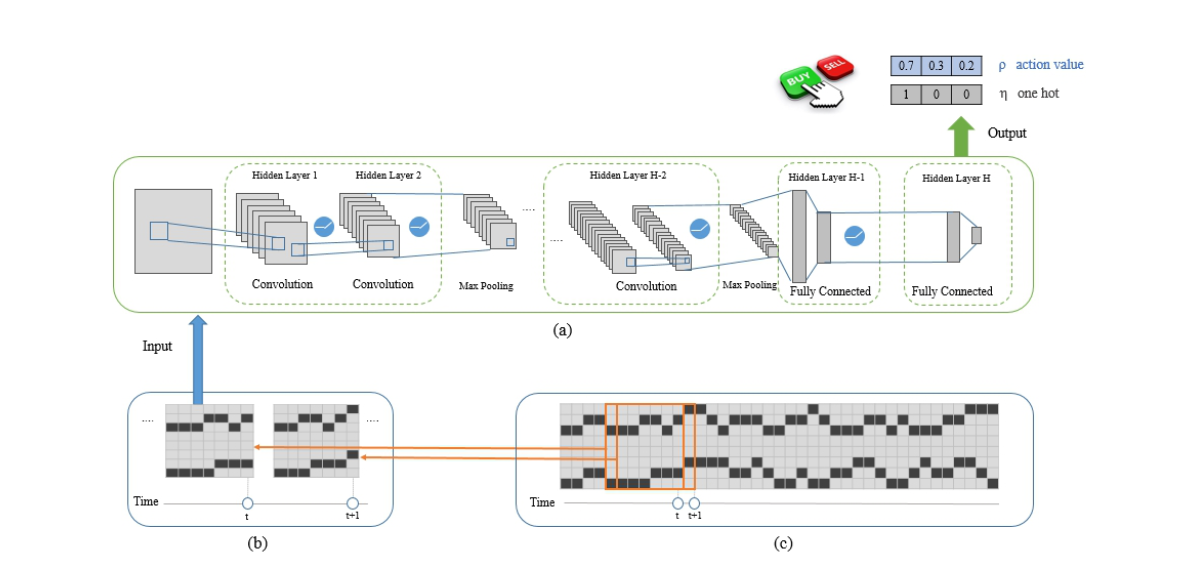

## Import lib

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from Cython.Build.Inline import _get_build_extension
import seaborn as sns
import tensorflow as tf
import keras
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [5]:
df = yf.download('TATAPOWER.NS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3375,2023-07-31,236.550003,238.899994,235.199997,236.699997,236.699997,18682254
3376,2023-08-01,237.399994,245.399994,236.250000,244.399994,244.399994,27535144
3377,2023-08-02,244.699997,244.699997,233.300003,235.750000,235.750000,22636262
3378,2023-08-03,235.250000,237.600006,232.550003,235.449997,235.449997,10784942
3379,2023-08-04,237.000000,237.350006,234.500000,235.649994,235.649994,7710303


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-26,128.829788,131.758621,127.010735,128.342453,98.619263,12492772
1,2009-11-27,127.478767,129.360550,125.741737,127.478767,97.955597,4397994
2,2009-11-30,128.347275,131.922668,127.864777,130.721222,100.447144,8326950
3,2009-12-01,131.242340,132.400360,129.148239,131.208557,100.821579,6201754
4,2009-12-02,131.724838,132.964890,129.891312,130.499268,100.276588,5334133
...,...,...,...,...,...,...,...
3375,2023-07-31,236.550003,238.899994,235.199997,236.699997,236.699997,18682254
3376,2023-08-01,237.399994,245.399994,236.250000,244.399994,244.399994,27535144
3377,2023-08-02,244.699997,244.699997,233.300003,235.750000,235.750000,22636262
3378,2023-08-03,235.250000,237.600006,232.550003,235.449997,235.449997,10784942


### Load Data

In [2]:
# Load the data from a CSV file
df = pd.read_csv("F:\stock price prediction\TATAPOWER.NS.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0
...,...,...,...,...,...,...,...
6874,2023-04-24,196.500000,196.699997,194.800003,195.850006,195.850006,5017631.0
6875,2023-04-25,195.850006,198.800003,195.350006,197.649994,197.649994,5957551.0
6876,2023-04-26,197.649994,198.949997,196.149994,198.199997,198.199997,4910837.0
6877,2023-04-27,198.449997,199.949997,197.649994,198.500000,198.500000,5215692.0


### Display Data

In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3375,2023-07-31,236.550003,238.899994,235.199997,236.699997,236.699997,18682254
3376,2023-08-01,237.399994,245.399994,236.250000,244.399994,244.399994,27535144
3377,2023-08-02,244.699997,244.699997,233.300003,235.750000,235.750000,22636262
3378,2023-08-03,235.250000,237.600006,232.550003,235.449997,235.449997,10784942
3379,2023-08-04,237.000000,237.350006,234.500000,235.649994,235.649994,7710303


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-11-26,128.829788,131.758621,127.010735,128.342453,98.619278,12492772
1,2009-11-27,127.478767,129.360550,125.741737,127.478767,97.955605,4397994
2,2009-11-30,128.347275,131.922668,127.864777,130.721222,100.447136,8326950
3,2009-12-01,131.242340,132.400360,129.148239,131.208557,100.821602,6201754
4,2009-12-02,131.724838,132.964890,129.891312,130.499268,100.276581,5334133


### Visualization

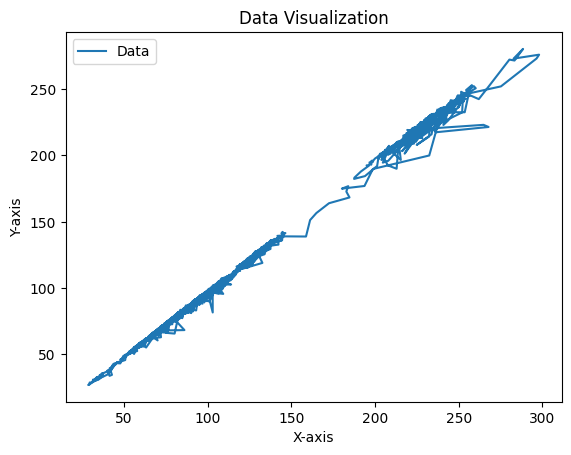

In [10]:
# Create a line plot of the data
plt.plot(df['High'], df['Low'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

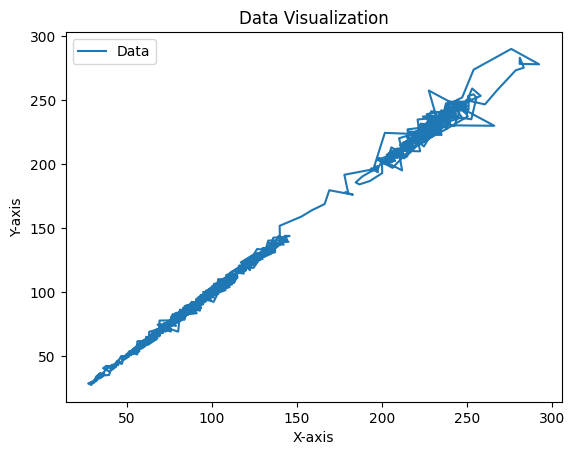

In [9]:
# Create a line plot of the data
plt.plot(df['Open'], df['Close'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [13]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], 
                                        high=df["High"],
                                        low=df["Low"], 
                                        close=df["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [14]:
import plotly.express as px
figure = px.line(data, x = data.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

In [15]:
figure = px.bar(data, x = data.index, 
                y = "Close", 
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

In [18]:
figure = px.line(data, x = data.index, 
                 y = 'Close', 
                 range_x = ['2019-07-01','2023-7-5'], 
                 title = "Time Series Analysis (Custom Date Range)")
figure.show()

SyntaxError: invalid syntax (2166153542.py, line 1)

In [ ]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import time

# Function to fetch candlestick data from TradingView
def fetch_candlestick_data():
    url = 'https://in.tradingview.com/chart/?symbol=NSE%3ABANKNIFTY'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract candlestick data from the HTML
    # Replace this part with the actual logic to parse the HTML and extract candlestick data
    # The structure of the HTML may change over time, so you need to inspect the TradingView website to find the appropriate elements to scrape
    candlestick_data = [
        {'date': '2023-08-02', 'open': 150.0, 'high': 155.0, 'low': 145.0, 'close': 152.0},
        {'date': '2023-08-03', 'open': 152.5, 'high': 158.0, 'low': 150.0, 'close': 155.0},
        # Add more data here
    ]
    
    return candlestick_data

# Function to update the candlestick chart
def update_chart():
    figure = go.Figure(data=[go.Candlestick(x=[],
                                           open=[],
                                           high=[],
                                           low=[],
                                           close=[])])
    figure.update_layout(title="Live Candlestick Chart",
                         xaxis_rangeslider_visible=False)
    
    while True:
        # Fetch live candlestick data
        candlestick_data = fetch_candlestick_data()
        
        # Extract data into separate lists for the chart
        dates = [data['date'] for data in candlestick_data]
        opens = [data['open'] for data in candlestick_data]
        highs = [data['high'] for data in candlestick_data]
        lows = [data['low'] for data in candlestick_data]
        closes = [data['close'] for data in candlestick_data]
        
        # Update the chart data
        figure.update_traces(x=dates,
                             open=opens,
                             high=highs,
                             low=lows,
                             close=closes)
        
        # Show the updated chart
        figure.show()
        
        # Wait for a few seconds before fetching new data again
        time.sleep(5)

# Start updating the chart
update_chart()


## live chart

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import time
import requests

# Function to fetch real-time stock price data from the API
def get_realtime_data():
    # Replace 'YOUR_API_KEY' with your actual API key
    api_key = 'YOUR_API_KEY'
    url = f'https://api.example.com/stock_data?symbol=AAPL&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

# Initial data for the chart (replace this with actual historical data)
data = {
    "Date": [],
    "Open": [],
    "High": [],
    "Low": [],
    "Close": []
}
df = pd.DataFrame(data)

figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], 
                                        high=df["High"],
                                        low=df["Low"], 
                                        close=df["Close"])])
figure.update_layout(title="Tata power", 
                     xaxis_rangeslider_visible=False)

# Function to update the chart with new data
def update_chart():
    while True:
        # Fetch real-time data
        new_data = get_realtime_data()
        
        # Update the DataFrame with new data
        df = df.append(new_data, ignore_index=True)
        
        # Update the chart
        figure.update_traces(x=df["Date"],
                             open=df["Open"],
                             high=df["High"],
                             low=df["Low"],
                             close=df["Close"])
        
        # Show the updated chart
        figure.show()
        
        # Wait for a few seconds before fetching new data again
        time.sleep(5)

# Start updating the chart
update_chart()

In [6]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0


In [7]:
# Feature engineering: add technical indicators
df.loc[:, 'MA_7'] = df['Close'].rolling(window=7).mean()
df.loc[:,'MA_14'] = df['Close'].rolling(window=14).mean()
df.loc[:,'MA_21'] = df['Close'].rolling(window=21).mean()
df.loc[:,'EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df.loc[:,'EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df.loc[:,'EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()

In [8]:
# Split the data into training, validation, and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)


In [9]:
# Create the feature matrix X and the target vector y for each set
X_train = train[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_train = train['Close']
X_val = val[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_val = val['Close']
X_test = test[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_test = test['Close']


In [10]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Open'] = scaler.fit_transform(df[['Open']])
df['High'] = scaler.fit_transform(df[['High']])
df['Low'] = scaler.fit_transform(df[['Low']])
df['Close'] = scaler.fit_transform(df[['Close']])

In [11]:
# Assuming you have a DataFrame df with columns for features (X) and target variable (y)
X = df.drop('Volume', axis=1)  # Assign the feature columns to X
y = df['Volume']  # Assign the 'Volume' column to y
# Drop rows with missing values from X and update y accordingly
X = X.dropna()
y = y.loc[X.index]

In [12]:
# Find rows with NaN values in y_train
nan_indices = np.isnan(y_train)

# Remove rows with NaN values from X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

In [13]:
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))


In [14]:
# Create an instance of HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

# Fit the model
model.fit(X_train, y_train)

C:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor()

In [15]:
# Create an imputer with a chosen strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform X_train
X_train = imputer.fit_transform(X_train)

In [16]:
# Convert X_train to a DataFrame
X_train = pd.DataFrame(X_train)

# Drop samples with missing values from X_train
X_train = X_train.dropna()

In [17]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

C:\Users\sai\AppData\Local\Temp\ipykernel_10892\51474837.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [18]:
# Convert X_val to a DataFrame if it's a numpy array
X_val = pd.DataFrame(X_val)

# Drop samples with missing values
X_val = X_val.dropna()

# Convert X_val back to a numpy array if desired
X_val = X_val.values

In [29]:
# Load the model
model = joblib.load('stock_model.joblib')

# Predict the close price for the new data
X_new = [[198.45, 199.95, 197.65, 198.50, 198.50, 5215692, 0.2, 0.3, 0.1]]  # Adjust the number of features to 9
y_new_pred = model.predict(X_new)

print('Predicted Close Price:', y_new_pred)


Predicted Close Price: [188.11799636]
